In [1]:
import tensorflow as tf

In [176]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
df = pd.read_csv(r"/content/drive/MyDrive/shell_dataset/dataset/train/train/train.csv")

In [84]:
df

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,12/31,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0
527036,12/31,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0
527037,12/31,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0
527038,12/31,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,44.17,-1,0.00,0.0,816.194,0.0,2.805,0.0,0.0


In [85]:
df['DATE (MM/DD)'] = df['DATE (MM/DD)']+"/2020" + " " + df['MST']

In [86]:
df['DATE (MM/DD)']

0           1/1/2020 00:00
1           1/1/2020 00:01
2           1/1/2020 00:02
3           1/1/2020 00:03
4           1/1/2020 00:04
                ...       
527035    12/31/2020 23:55
527036    12/31/2020 23:56
527037    12/31/2020 23:57
527038    12/31/2020 23:58
527039    12/31/2020 23:59
Name: DATE (MM/DD), Length: 527040, dtype: object

In [87]:
da = pd.to_datetime(df['DATE (MM/DD)'], format='%m/%d/%Y %H:%M')

In [88]:
da

0        2020-01-01 00:00:00
1        2020-01-01 00:01:00
2        2020-01-01 00:02:00
3        2020-01-01 00:03:00
4        2020-01-01 00:04:00
                 ...        
527035   2020-12-31 23:55:00
527036   2020-12-31 23:56:00
527037   2020-12-31 23:57:00
527038   2020-12-31 23:58:00
527039   2020-12-31 23:59:00
Name: DATE (MM/DD), Length: 527040, dtype: datetime64[ns]

In [89]:
df.index = da
df

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
DATE (MM/DD),,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1/1/2020 00:00,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
2020-01-01 00:01:00,1/1/2020 00:01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2020-01-01 00:02:00,1/1/2020 00:02,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
2020-01-01 00:03:00,1/1/2020 00:03,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
2020-01-01 00:04:00,1/1/2020 00:04,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00,12/31/2020 23:55,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0
2020-12-31 23:56:00,12/31/2020 23:56,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0
2020-12-31 23:57:00,12/31/2020 23:57,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0


In [90]:
df = df.drop(['DATE (MM/DD)','MST'], axis = 1)

In [91]:
df

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
DATE (MM/DD),,,,,,,,,,,,,,,
2020-01-01 00:00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
2020-01-01 00:01:00,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2020-01-01 00:02:00,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
2020-01-01 00:03:00,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
2020-01-01 00:04:00,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,-1,0.00,0.0,816.186,0.0,2.899,0.0,0.0
2020-12-31 23:56:00,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,-1,0.00,0.0,816.185,0.0,2.866,0.0,0.0
2020-12-31 23:57:00,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,-1,0.00,0.0,816.198,0.0,2.882,0.0,0.0


In [92]:
df = df.resample('10T').mean()

In [93]:
df['Direct sNIP [W/m^2]'].max()

1067.236

In [94]:
df['Direct sNIP [W/m^2]'].min()

-7.9347710000000005

In [95]:
(df['Albedo (CMP11)']>0.137).sum()

25272

In [96]:
dfday = df[df['Albedo (CMP11)']>0.138]

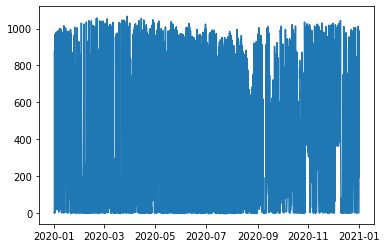

In [97]:
plt.plot(dfday['Direct sNIP [W/m^2]'])

In [98]:
d1 = df[df.index.floor('D') == '2020-01-01']
d1

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
DATE (MM/DD),,,,,,,,,,,,,,,
2020-01-01 00:00:00,-0.926932,-0.054401,144.453589,7.2506,1.0550,-7.3050,32.275,-1.0,7.900,283.26,806.6870,0.0,0.1807,0.0,0.0
2020-01-01 00:10:00,-0.935475,-0.173586,8.398820,7.2572,1.1167,-7.1133,32.804,-1.0,10.325,279.85,806.3905,0.0,0.1827,0.0,0.0
2020-01-01 00:20:00,-0.955498,-0.176554,16.110666,7.3086,1.1805,-6.9695,33.099,-1.0,7.350,279.09,806.3230,0.0,0.1733,0.0,0.0
2020-01-01 00:30:00,-0.907061,-0.194358,23.409148,7.2988,1.2020,-6.9180,33.270,-1.0,9.025,286.97,806.1980,0.0,0.1750,0.0,0.0
2020-01-01 00:40:00,-0.802380,-0.284367,30.176316,7.2630,1.1866,-6.8534,33.544,-1.0,8.400,296.13,806.2815,0.0,0.1819,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 23:10:00,-0.853654,-0.186445,324.144144,3.6933,-1.7284,-10.6884,30.686,-1.0,9.675,284.76,800.4563,0.0,0.2669,0.0,0.0
2020-01-01 23:20:00,-0.757319,-0.200786,330.354555,3.2673,-1.7624,-9.8224,34.136,-1.0,9.450,285.00,800.6093,0.0,0.2798,0.0,0.0
2020-01-01 23:30:00,-0.796173,-0.134022,337.142542,3.0838,-1.8440,-9.8240,34.575,-1.0,7.050,286.41,800.8210,0.0,0.2767,0.0,0.0


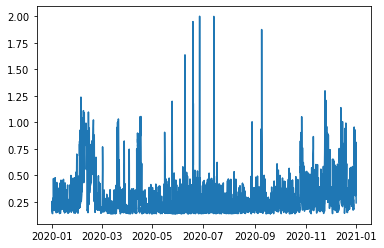

In [99]:
plt.plot(dfday['Albedo (CMP11)'])

In [100]:
train_dir = r"/content/drive/MyDrive/shell_dataset/dataset/train/train"
#/content/drive/MyDrive/shell_dataset/dataset/train/train/0101/0101074000.jpg

In [70]:
trainimg = []
for root, dirs, files in os.walk(train_dir, topdown=False):
    for name in files:
        if name.split(".")[1] == 'csv':
            continue
        elif name.split(".")[1] == 'jpg':
            trainimg.append(os.path.join(root, name))
        #print(os.path.join(root, name))

In [101]:
len(trainimg)

25261

In [229]:
filenames = pd.Series(trainimg, name='Filepath')

In [230]:
y=dfday['Direct sNIP [W/m^2]']
x = dfday.drop('Direct sNIP [W/m^2]', axis = 1)

In [231]:
((x['Total Cloud Cover [%]']<0).sum()/len(x))*100

3.9680025344527166

In [232]:
((x['Snow Depth [cm]']<0).sum()/len(x))*100

14.29985743703469

In [233]:
x[x['Snow Depth [cm]'] < 0] = np.nan

In [234]:
x[x['Total Cloud Cover [%]'] < 0] = np.nan

In [235]:
x

,Global CMP22 (vent/cor) [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
DATE (MM/DD),,,,,,,,,,,,,,
2020-01-01 07:40:00,12.17524,123.432519,7.0196,1.4290,-5.6010,38.004,1.7,2.725,218.250,802.1293,0.0,0.1517,0.0,0.18285
2020-01-01 07:50:00,24.76317,125.099799,7.6148,1.8802,-5.1888,37.825,19.9,4.575,263.970,801.9527,0.0,0.3109,0.0,0.19227
2020-01-01 08:00:00,39.45137,126.801204,8.8040,2.5528,-4.9862,35.472,37.4,5.775,268.420,802.3032,0.0,0.2422,0.0,0.21520
2020-01-01 08:10:00,36.77850,128.538754,9.3120,2.8692,-4.7888,34.860,26.0,9.175,267.330,802.0695,0.0,0.2413,0.0,0.20680
2020-01-01 08:20:00,33.79576,130.314377,9.2720,2.8816,-4.6874,35.267,15.6,6.350,289.010,802.5851,0.0,0.1743,0.0,0.19448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 15:40:00,67.43591,229.829576,3.1076,-1.2819,-7.8019,41.263,74.2,2.325,16.182,812.2933,0.0,2.7647,0.0,0.26499
2020-12-31 15:50:00,53.08244,231.602956,2.7982,-1.4410,-7.7610,42.320,67.8,2.300,15.563,812.3914,0.0,2.7564,0.0,0.26479
2020-12-31 16:00:00,37.26615,233.338437,2.5820,-1.6254,-8.0554,41.883,59.3,2.400,16.945,812.5502,0.0,2.7415,0.0,0.25817


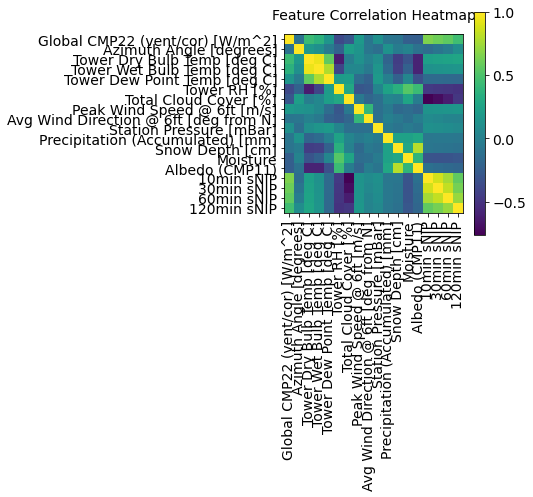

In [278]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

show_heatmap(x)

In [279]:
xwl = x
xwl["Current sNIP"] = y
xwl['10min sNIP'] = y.shift(1)
xwl['30min sNIP'] = y.shift(3)
xwl['60min sNIP'] = y.shift(6)
xwl['120min sNIP'] = y.shift(12)
y12 = y.shift(-1)

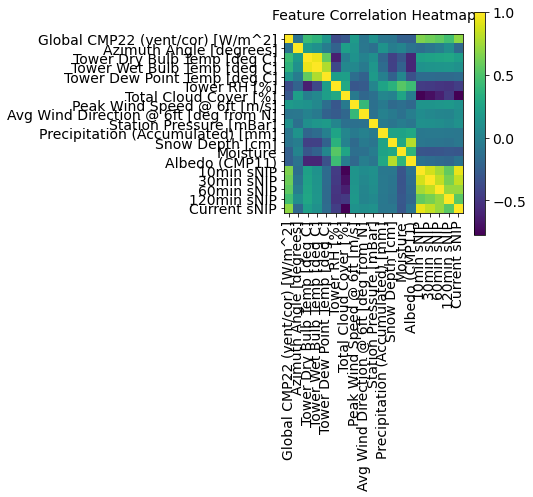

In [280]:
show_heatmap(xwl)

In [281]:
xwl = xwl[12:]
xwl = xwl[:-3]

In [282]:
y12 = y12[12:]
y12 = y12[:-3]

In [283]:
y12.shape

(25237,)

In [284]:
xwl.shape

(25237, 19)

In [285]:
imputer = KNNImputer(n_neighbors=2)

In [286]:
x_filled = imputer.fit_transform(x)

In [242]:
x_filled

array([[ 1.21752400e+01,  1.23432519e+02,  7.01960000e+00, ...,
         3.12191832e+02,  4.34286420e+02,  4.64700130e+02],
       [ 2.47631700e+01,  1.25099799e+02,  7.61480000e+00, ...,
         1.20674510e+00,  1.31689515e+02,  2.97281920e+00],
       [ 3.94513700e+01,  1.26801204e+02,  8.80400000e+00, ...,
         2.94609120e+00,  1.02041219e+02,  2.10619987e+02],
       ...,
       [ 3.72661500e+01,  2.33338437e+02,  2.58200000e+00, ...,
         4.50317800e-01,  5.31295200e+00,  8.77716000e+02],
       [ 2.30415200e+01,  2.35037958e+02,  2.44210000e+00, ...,
        -6.66581000e-02,  1.72523300e+00,  8.74952600e+02],
       [ 1.42620900e+01,  2.36703538e+02,  2.20560000e+00, ...,
        -1.71336800e-01,  1.65709260e+00,  5.61712000e+02]])

In [117]:
scaler = StandardScaler()
xx = scaler.fit_transform(x_filled)

In [118]:
xx

array([[-1.41429467, -0.87924816, -0.70912252, ..., -0.47049107,
        -0.15319973, -0.07417554],
       [-1.37046862, -0.85214519, -0.6521655 , ..., -1.27886503,
        -0.93981688, -1.27447872],
       [-1.31933027, -0.82448748, -0.53836629, ..., -1.27434378,
        -1.01688925, -0.73468055],
       ...,
       [-1.32693832,  0.90736096, -1.13377385, ..., -1.28083128,
        -1.26833965,  0.9994977 ],
       [-1.3764627 ,  0.93498804, -1.14716143, ..., -1.28217511,
        -1.27766612,  0.99231398],
       [-1.40702911,  0.96206338, -1.16979304, ..., -1.28244721,
        -1.27784326,  0.17801585]])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.20, random_state=42)

In [139]:
regressor = SVR(kernel = 'rbf')

In [140]:
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
y_pred = regressor.predict(X_test)

In [142]:
y_test.shape

(5051,)

In [143]:
y_pred.shape

(5051,)

In [144]:
r2_score(y_test, y_pred)

0.844692212420726

In [145]:
mean_absolute_error(y_test, y_pred)

105.52309125623457

In [146]:
y = y.reset_index()

In [147]:
y

,DATE (MM/DD),Direct sNIP [W/m^2]
0,2020-01-01 07:40:00,0.384260
1,2020-01-01 07:50:00,0.354592
2,2020-01-01 08:00:00,0.806115
3,2020-01-01 08:10:00,3.015754
4,2020-01-01 08:20:00,1.603335
...,...,...
25247,2020-12-31 15:40:00,-0.066658
25248,2020-12-31 15:50:00,-0.171337
25249,2020-12-31 16:00:00,-0.124923
25250,2020-12-31 16:10:00,-0.144675


In [148]:
images = pd.concat([filenames, y], axis=1)

In [149]:
images

,Filepath,DATE (MM/DD),Direct sNIP [W/m^2]
0,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 07:40:00,0.384260
1,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 07:50:00,0.354592
2,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 08:00:00,0.806115
3,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 08:10:00,3.015754
4,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 08:20:00,1.603335
...,...,...,...
25256,/content/drive/MyDrive/shell_dataset/dataset/t...,NaT,NaN
25257,/content/drive/MyDrive/shell_dataset/dataset/t...,NaT,NaN
25258,/content/drive/MyDrive/shell_dataset/dataset/t...,NaT,NaN
25259,/content/drive/MyDrive/shell_dataset/dataset/t...,NaT,NaN


In [150]:
imgs = images.dropna()

In [151]:
imgs

,Filepath,DATE (MM/DD),Direct sNIP [W/m^2]
0,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 07:40:00,0.384260
1,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 07:50:00,0.354592
2,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 08:00:00,0.806115
3,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 08:10:00,3.015754
4,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-01-01 08:20:00,1.603335
...,...,...,...
25247,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-12-31 15:40:00,-0.066658
25248,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-12-31 15:50:00,-0.171337
25249,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-12-31 16:00:00,-0.124923
25250,/content/drive/MyDrive/shell_dataset/dataset/t...,2020-12-31 16:10:00,-0.144675


In [307]:
xwl

,Global CMP22 (vent/cor) [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),10min sNIP,30min sNIP,60min sNIP,120min sNIP,Current sNIP
DATE (MM/DD),,,,,,,,,,,,,,,,,,,
2020-01-01 09:40:00,378.35290,146.076955,10.9790,3.7032,-4.7468,31.297,34.2,2.000,171.920,801.8243,0.0,0.0829,0.0,0.23963,878.871700,16.667287,101.844688,0.384260,798.989700
2020-01-01 09:50:00,444.95680,148.256832,11.0480,3.7583,-4.6707,31.351,70.6,2.925,139.300,801.6281,0.0,0.2906,0.0,0.23124,798.989700,288.050077,130.387950,0.354592,774.599500
2020-01-01 10:00:00,255.80200,150.483911,11.1790,3.8822,-4.5478,31.412,85.3,2.875,126.200,801.6285,0.0,0.2242,0.0,0.20900,774.599500,878.871700,167.031747,0.806115,233.273973
2020-01-01 10:10:00,142.70960,152.757326,10.1980,3.3107,-4.8083,32.795,93.7,3.575,74.744,801.7288,0.0,0.2215,0.0,0.18974,233.273973,798.989700,16.667287,3.015754,2.527140
2020-01-01 10:20:00,123.62410,155.075754,10.1610,3.2919,-4.7971,32.907,95.2,2.280,109.451,801.7869,0.0,0.3592,0.0,0.18842,2.527140,774.599500,288.050077,1.603335,0.652311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 15:10:00,127.09990,224.264303,4.5125,-0.5095,-7.6995,37.704,89.4,1.150,31.635,812.1537,0.0,2.7693,0.0,0.27874,5.312952,164.115530,874.952600,151.027380,1.725233
2020-12-31 15:20:00,108.74750,226.161893,4.0927,-0.7011,-7.6011,39.166,79.6,1.330,19.319,812.1841,0.0,2.7574,0.0,0.27777,1.725233,27.355372,561.712000,153.274040,1.657093
2020-12-31 15:30:00,92.71921,228.016458,3.5882,-1.0554,-7.9154,39.482,73.3,1.975,18.004,812.1978,0.0,2.7702,0.0,0.27491,1.657093,5.312952,323.521300,197.396300,0.450318


(64, 64)


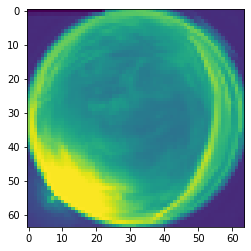

In [161]:
tim = Image.open(imgs['Filepath'][13])
tim1 = tim.convert('L')
nh = int(tim1.size[1] / 24)
nl = int(tim1.size[0] / 24)
ns = (nl, nh)
timds = tim1.resize(ns)
imshow(timds)
print(np.array(timds).shape)

In [168]:
fimg = []
for v,c in enumerate(imgs['Filepath']):
  tim = Image.open(c)
  tim1 = tim.convert('L')
  nh = int(tim1.size[1] / 24)
  nl = int(tim1.size[0] / 24)
  ns = (nl, nh)
  timds = tim1.resize(ns)
  tnp = np.array(timds)
  fimg.append(tnp)
  print(v)
print("Done")

Streaming output truncated to the last 5000 lines.
20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20302
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20318
20319
20320
20321
20322
20323
20324
20325
20326
20327
20328
20329
20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
20340
20341
20342
20343
20344
20345
20346
20347
20348
20349
20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
20365
20366
20367
20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
2

In [171]:
fimg = np.array(fimg)
fimg.shape

(25252, 64, 64)

In [174]:
tt = fimg.T
ttr = fimg.reshape(tt.shape[0] * tt.shape[1], tt.shape[2])
ttr.shape

(4096, 25252)

In [305]:
with open('img64x64.npy', 'wb') as f:
    np.save(f, ttr)

In [259]:
pca = PCA(n_components=10)
pc10 = pca.fit_transform(ttr.T)

In [261]:
pc10.shape

(25252, 10)

In [287]:
dfpca = pd.DataFrame(pc10)
dfpca

,0,1,2,3,4,5,6,7,8,9
0,-1312.929402,652.056748,-33.526698,-1420.688876,703.991212,891.263927,865.724617,233.155556,499.555479,-412.255001
1,-1322.926534,644.994577,95.151346,-1410.869772,773.250520,806.800739,909.112089,300.883999,409.516968,-480.815179
2,-1296.798368,632.607247,233.351473,-1402.073430,810.340906,672.104937,922.648998,368.345667,311.903777,-566.133143
3,-1242.068513,639.993147,364.548297,-1402.475209,813.839220,498.782845,904.732301,438.782183,217.351213,-648.358188
4,-1313.123194,620.475851,490.671515,-1291.050230,929.322614,382.972573,964.730100,517.106083,87.133934,-592.696651
...,...,...,...,...,...,...,...,...,...,...
25247,-1133.010328,-841.692087,175.978804,1477.787623,-673.111880,-914.366510,528.289021,-646.056216,534.303622,-242.385369
25248,-1157.559703,-889.083985,19.877403,1445.026107,-848.299110,-892.154172,582.692267,-626.118766,430.412749,-319.129632
25249,-1174.469642,-907.300251,-106.787466,1416.653949,-972.434166,-839.057924,595.480330,-571.600806,328.387898,-387.527807
25250,-1172.452416,-876.216885,-232.107337,1415.018149,-1051.845853,-747.739188,583.141130,-498.130347,243.195424,-480.590685


In [288]:
dfpca = dfpca[12:]
dfpca = dfpca[:-3]

In [289]:
dfpca.shape

(25237, 10)

In [290]:
xwl.shape

(25237, 19)

In [291]:
dfpca.index = xwl.index

In [292]:
mdf = pd.concat([xwl, dfpca], axis=1)
mdf.shape

(25237, 29)

In [310]:
mdf

,Global CMP22 (vent/cor) [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),10min sNIP,30min sNIP,60min sNIP,120min sNIP,Current sNIP,0,1,2,3,4,5,6,7,8,9
DATE (MM/DD),,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 09:40:00,378.35290,146.076955,10.9790,3.7032,-4.7468,31.297,34.2,2.000,171.920,801.8243,0.0,0.0829,0.0,0.23963,878.871700,16.667287,101.844688,0.384260,798.989700,-1256.588581,539.872816,1332.165380,-519.353916,952.892967,-615.506383,618.925489,723.316858,-646.118462,-29.934287
2020-01-01 09:50:00,444.95680,148.256832,11.0480,3.7583,-4.6707,31.351,70.6,2.925,139.300,801.6281,0.0,0.2906,0.0,0.23124,798.989700,288.050077,130.387950,0.354592,774.599500,-1281.932087,523.929650,1353.750073,-388.421223,950.063848,-726.284239,571.742433,739.750071,-610.232444,90.650508
2020-01-01 10:00:00,255.80200,150.483911,11.1790,3.8822,-4.5478,31.412,85.3,2.875,126.200,801.6285,0.0,0.2242,0.0,0.20900,774.599500,878.871700,167.031747,0.806115,233.273973,-1285.565049,514.564087,1401.833083,-260.517499,906.334578,-795.177665,489.539532,733.304357,-594.463234,211.862009
2020-01-01 10:10:00,142.70960,152.757326,10.1980,3.3107,-4.8083,32.795,93.7,3.575,74.744,801.7288,0.0,0.2215,0.0,0.18974,233.273973,798.989700,16.667287,3.015754,2.527140,-1236.098703,514.231102,1480.534335,-140.647256,815.470382,-838.708999,382.036537,683.399614,-607.978134,329.027374
2020-01-01 10:20:00,123.62410,155.075754,10.1610,3.2919,-4.7971,32.907,95.2,2.280,109.451,801.7869,0.0,0.3592,0.0,0.18842,2.527140,774.599500,288.050077,1.603335,0.652311,-1287.181337,494.144664,1468.640353,-3.100302,795.447008,-986.532716,297.689473,685.365690,-497.853927,394.736357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 15:10:00,127.09990,224.264303,4.5125,-0.5095,-7.6995,37.704,89.4,1.150,31.635,812.1537,0.0,2.7693,0.0,0.27874,5.312952,164.115530,874.952600,151.027380,1.725233,-1188.741744,-916.319602,538.433149,1353.330408,-339.114118,-1094.486066,534.593226,-796.896627,510.585407,123.886509
2020-12-31 15:20:00,108.74750,226.161893,4.0927,-0.7011,-7.6011,39.166,79.6,1.330,19.319,812.1841,0.0,2.7574,0.0,0.27777,1.725233,27.355372,561.712000,153.274040,1.657093,-1186.844215,-929.843073,406.097436,1388.003955,-470.514724,-1089.194521,550.629236,-778.519611,490.565230,1.830528
2020-12-31 15:30:00,92.71921,228.016458,3.5882,-1.0554,-7.9154,39.482,73.3,1.975,18.004,812.1978,0.0,2.7702,0.0,0.27491,1.657093,5.312952,323.521300,197.396300,0.450318,-1166.365012,-899.197685,285.970863,1421.959449,-580.503376,-1027.488781,559.959681,-723.582922,506.916269,-117.233002


In [293]:
regpca = SVR(kernel = 'rbf')

In [299]:
ypca = imgs['Direct sNIP [W/m^2]']
ypca = ypca[12:]
ypca = ypca[:-3]

In [295]:
imputer = KNNImputer(n_neighbors=2)

In [296]:
pca_f = imputer.fit_transform(mdf)

In [297]:
scaler = StandardScaler()
xx_pca = scaler.fit_transform(pca_f)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(xx_pca, ypca, test_size=0.20, random_state=42)

In [301]:
regpca.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [302]:
y_pred = regpca.predict(X_test)

In [303]:
r2_score(y_test, y_pred)

0.910336413265759

In [304]:
mean_absolute_error(y_test, y_pred)

81.80907634696655

In [306]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regpca, open(filename, 'wb'))